In [1]:
from datasets import load_dataset

dataset = load_dataset("hackathon-pln-es/readability-es-caes")

e:\python_enviroments\envs\nlpenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'level', 'level-3'],
        num_rows: 31149
    })
})

In [3]:
train_data = dataset["train"]

# Data Analysis

In [4]:
# Import necessary libraries
import pandas as pd

In [5]:
# Convert the dataset to a Pandas DataFrame for exploration
df = pd.DataFrame(train_data)

In [6]:
df

,category,text,level,level-3
0,B1,Hola Carlos ! Hace mucho que no te veo hombre ...,simple,intermediate
1,A2,"Hola querida Sara , espero que estes muy bien ...",simple,basic
2,A1,Como estais ? ! Hola amigos ! ? Espero que tod...,simple,basic
3,A2,"Cuando llegué a el destino , le propuso que si...",simple,basic
4,A1,¿ Que tal ? un beso Espero que todo va bien po...,simple,basic
...,...,...,...,...
31144,B1,Buenas tardes ! 29_de_mayo_de_2019 salamanca Q...,simple,intermediate
31145,B2,Tengo la seguridad de mí mismo para contener e...,complex,intermediate
31146,B1,"Distinguidos señor / señra : Hola , gerente . ...",simple,intermediate
31147,B2,Le escribo esta carta porque me gustaría inmen...,complex,intermediate


In [7]:
df.iloc[0:10] #testing 10 first row

,category,text,level,level-3
0,B1,Hola Carlos ! Hace mucho que no te veo hombre ...,simple,intermediate
1,A2,"Hola querida Sara , espero que estes muy bien ...",simple,basic
2,A1,Como estais ? ! Hola amigos ! ? Espero que tod...,simple,basic
3,A2,"Cuando llegué a el destino , le propuso que si...",simple,basic
4,A1,¿ Que tal ? un beso Espero que todo va bien po...,simple,basic
5,A1,¿ Cómo estas chica ? Había regresado de México...,simple,basic
6,A1,Acudí a su compañía la dirección de la cual ví...,simple,basic
7,A1,"Jueves 12_de_Avril 2018 , Como estas ? Hace mu...",simple,basic
8,B1,"Cuando llegué a el destino , le propuso que si...",simple,intermediate
9,A1,"Mi padres , tengo el español clase , desde las...",simple,basic


In [8]:
df["text"][0]  # only text

'Hola Carlos ! Hace mucho que no te veo hombre ! Cómo está tu vida ? Trabajando muchísimo como siempre , no ? Continuas en el Instituto_Cervantes ahí de España ? Espero que sí , pues tu trabajo es buenísimo . Y por_favor , dí me lo ! Todavía vives con Maria ? ya estáis casados o sigues soltero ? Yo sigo soltera como siempre , tu sabes , hay cosas que no cambian . Pero tengo que contar te lo de Cláudia , está casada con Francisco , te acuerdas de Francisco ? El chico rubio de nuestra clase , el que no hablaba con nadie . Pues esta casada con el , y ella también ya no habla con nadie . Intento llamar la por teléfono pero sin respuestas . Es una lástima pues erámos muy amigas . Ya sabes , Carlos , que voy a viajar a Europa el próximo año . Voy a quedar me en Francia estudiando por seis meses . Después de esto tendré un més para quedar me donde quiera , por eso he pensado en visitar te . Sabes cuanto me gustaría conocer Madrid y , además , te echo de menos , pues hace mucho tiempo que no v

## Checking categories

In [9]:
# Count the number of elements per category
category_counts = df["category"].value_counts()
category_counts

category
A2    8582
A1    8261
B1    6510
B2    4729
C1    3067
Name: count, dtype: int64

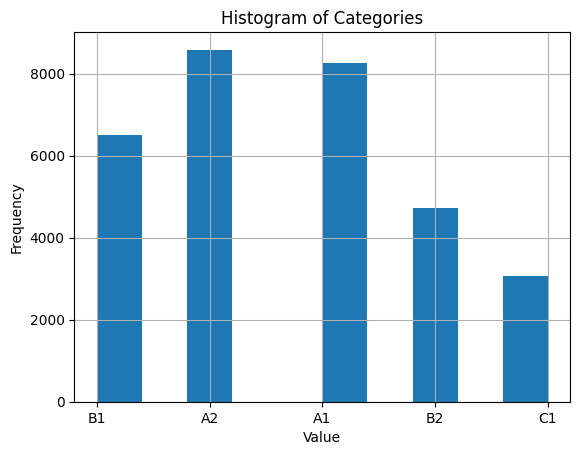

In [10]:
import matplotlib.pyplot as plt
df['category'].hist()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Categories')
plt.show()


Counting the number of elements per category we could figure out that the data is unbalanced which can make some issues in the accuracy prediction for the categories with less data.
We need to use some techniques to balance the data.

## Verifying column's Dtypes

In [11]:
df.describe()

,category,text,level,level-3
count,31149,30935,31149,31149
unique,5,20630,2,3
top,A2,"Hola amiga , Buenas Tardes .",simple,basic
freq,8582,20,23353,16843


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31149 entries, 0 to 31148
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  31149 non-null  object
 1   text      30935 non-null  object
 2   level     31149 non-null  object
 3   level-3   31149 non-null  object
dtypes: object(4)
memory usage: 973.5+ KB


In [13]:
#casting text to String
df['text'] = df['text'].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31149 entries, 0 to 31148
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  31149 non-null  object
 1   text      31149 non-null  object
 2   level     31149 non-null  object
 3   level-3   31149 non-null  object
dtypes: object(4)
memory usage: 973.5+ KB


In [15]:
# Initialize a variable to store the maximum text length
max_text_length = max(len(example["text"]) for example in train_data if example["text"] is not None)
max_text_length

2847

# let's filter the rows based on text lenght less than 512

In [16]:
max_length = df['text'].apply(len).max()
max_length

2847

In [17]:
df.shape

(31149, 4)

so the max lenght of the text samples is 2847 units.

In [18]:
filtered_df = df[df['text'].apply(len) < 512]

In [19]:
filtered_df.shape

(7424, 4)

we have 7424 rows that have a lenght less than 512

## Checking None Values


In [20]:
# Check if there are any None values in the "text" column
has_none_values = df["text"].isna().any()

if has_none_values:
    print("There are None values in the 'text' column.")
else:
    print("There are no None values in the 'text' column.")


There are no None values in the 'text' column.


## Conclusions
we can conlcude the following:
- the data is unbalanced thus it's necessary apply some balancing techniques
- the text column has a max lenght of 2847 units
- there is no null values thus it's no necessary to delete rows
- The categories are string, so it's important to cast them into a numerical value